<a href="https://colab.research.google.com/github/bforeman44/FDSfE_BForeman/blob/main/HW3/HW3_citibikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Federica B. Bianco @fedhere
# for UDel FDSfE 2022


Citibikes is the shared bike services for NYC and they historically have done a great job at making their data public (while respecting people's privacy of course! well... almost always... https://www.wsj.com/articles/SB10001424127887323829104578624263439561672)

-  The "idea" is that citi bikes, which are farily bulky bikes, may be designed in such a way that they are more comfortable for larger people, and therefore, on average, for men.  

-  If the bikes are uncomfortable, the users will not use them for long trips. So to test that you can measure the trip duration for customers that are registered as male and customers that are registered as female and see (1) if they  have the same mean, and (2) if they are "the same" distribution (more precisely you will meausre if they come from the "same parent distribution"). 

-  Choose the significance threshold

-  Wrangle the data so that it is ready for your analysis.

-  Explore the data statistical properties (mean, standard deviation...)

-  Clearly state they Null and Alternate hypothesis for the first question

-  Answer the first question with a t-test

-  Clearly state they Null and Alternate hypothesis for the second question

-  Answer the second question with a ks_2sample test


-  Extra Credit: split the sample in week-days and weekends and redo the analysis for the week-days and weekend cases separately

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# IDEA:
 Citibike usage would be different by gender if the bikes are more comfrotable for people who are taller and with larger frames.

Remember: 
### NULL HYPOTHESIS _H0_:
You want to falsify it so make it the opposite of your idea


### ALTERNATIVE HYPOTHESIS _HA_:
This shoudl be the complement of the NULL, including everything that the NULL does not




In [3]:
pvalue = 0.05

# <mark>WFF</mark> You must actually provide H0 and HA in the form of some statement. In this case you would say:

H0: Customers identified as women take longer or equivalently longer rides as customers identified as males.

HA: Customers identified as women take shorrter rides than customers identified as males.

# Data gathering
Get a single month of data:  reading data from citibike csv file from May 2019



read a csv file with pandas so that the content is stored in a "DataFrame". 

In [4]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")
cbMay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


# Data Exploration

you know what to do!

In [5]:
cbMay19.shape

(1924563, 15)

In [6]:
cbMay19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [7]:
cbMay19.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0
1924562,964,2019-05-31 23:59:55.5500,2019-06-01 00:15:59.8680,285,Broadway & E 14 St,40.734546,-73.990741,3656,E 2 St & Avenue A,40.723077,-73.985836,32565,Subscriber,1992,2


In [8]:
cbMay19.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06
mean,1.067189e+03,1.671397e+03,4.073698e+01,-7.398223e+01,1.664596e+03,4.073675e+01,-7.398248e+01,2.712861e+04,1.979833e+03,1.152992e+00
std,1.254636e+04,1.473509e+03,3.062224e-02,1.970116e-02,1.473196e+03,3.048823e-02,1.976340e-02,6.404188e+03,1.199213e+01,5.516776e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.406860e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.790000e+02,3.820000e+02,4.071740e+01,-7.399595e+01,3.800000e+02,4.071723e+01,-7.399601e+01,2.082600e+04,1.969000e+03,1.000000e+00
50%,6.530000e+02,5.160000e+02,4.073726e+01,-7.398518e+01,5.150000e+02,4.073705e+01,-7.398584e+01,2.878200e+04,1.982000e+03,1.000000e+00
75%,1.158000e+03,3.293000e+03,4.075757e+01,-7.397121e+01,3.292000e+03,4.075715e+01,-7.397152e+01,3.257600e+04,1.990000e+03,1.000000e+00
max,2.922656e+06,3.790000e+03,4.081439e+01,-7.390774e+01,3.790000e+03,4.081439e+01,-7.390774e+01,3.800200e+04,2.003000e+03,2.000000e+00


In [9]:
cbMay19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924563 entries, 0 to 1924562
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 220.2+ MB


You hsould have noticed the column gender: its encoded as a binary - 1 is for customers that identified as male, 2 for customers that identified as female. 0 is for non-binary and not registered genders

Because your variable of interest is "tripduration" explore this variable in some more detail. 

# <mark>WFF</mark> You did not explore the tripduration variable. In general it is always important to explore your data fully in case there is something unexpected. Very good job at exploring the general statistics of the dataset though!

## Plot the trip duration distribution

hint: when I say plot the distribution generally that means make a histogram


In [10]:
cbMay19.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

Text(0, 0.5, '# of Trips')

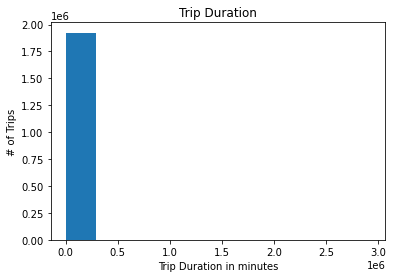

In [11]:
# your code here
plt.hist(cbMay19["tripduration"])
plt.title("Trip Duration")
plt.xlabel("Trip Duration in minutes")
plt.ylabel("# of Trips")

Figure 1:. ...

# <mark>WFF</mark> This figure needs a suitable caption which describes it and explains its significance.

there are some really large numbers... trips that last >1000000 minutes...  clearly this is a data curation issue. 

You need to clean the data by removin all data for which tripduration > 1 day (remember the duration is in minutes) and remake the plot


You can do it by setting the condition 

```cbMay19["tripduration"] < ...```

and using this condition as an index

```cbMay19_clean = cbMay19[cbMay19["tripduration"]....```

Remake the histogram, now the sahape of the tripduration distribution should be much clearer

Text(0, 0.5, '# of Trips')

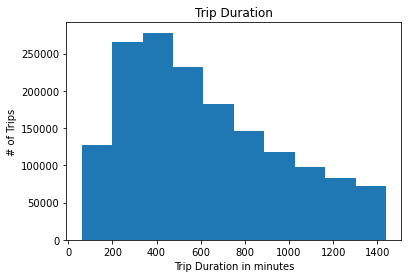

In [12]:
# your code here
cbMay19_clean = cbMay19[cbMay19["tripduration"] < 1440]
plt.hist(cbMay19_clean["tripduration"])
plt.title("Trip Duration")
plt.xlabel("Trip Duration in minutes")
plt.ylabel("# of Trips")

Figure 2: ...

# <mark>WFF</mark> This also needs a descriptive caption

# Data Wrangling 

Split the data into two dataframes by gender
save the data corresponding to "gender" == 1 and the data corresponding to "gender" == 2 into two separate dataframes. Again you can do it by setting a condition on the column ```["gender"]```

In [13]:
df = pd.DataFrame(cbMay19_clean)
men = df[df["gender"] == 1]
men


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
6,514,2019-05-01 00:01:06.0520,2019-05-01 00:09:40.1670,439,E 4 St & 2 Ave,40.726281,-73.989780,336,Sullivan St & Washington Sq,40.730477,-73.999061,15160,Subscriber,1988,1
7,524,2019-05-01 00:01:21.0070,2019-05-01 00:10:05.9440,380,W 4 St & 7 Ave S,40.734011,-74.002939,439,E 4 St & 2 Ave,40.726281,-73.989780,16742,Subscriber,1964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924548,187,2019-05-31 23:59:21.1690,2019-06-01 00:02:28.7060,3496,1 Ave & E 110 St,40.792327,-73.938300,3502,Lexington Ave & E 111 St,40.795412,-73.944123,26794,Subscriber,1992,1
1924549,345,2019-05-31 23:59:22.6070,2019-06-01 00:05:08.5390,3298,Warren St & Court St,40.686371,-73.993833,3377,Carroll St & Bond St,40.678612,-73.990373,33433,Subscriber,1993,1
1924551,233,2019-05-31 23:59:28.4400,2019-06-01 00:03:21.5050,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34972,Subscriber,1974,1
1924553,824,2019-05-31 23:59:29.8370,2019-06-01 00:13:13.8450,3117,Franklin St & Dupont St,40.735640,-73.958660,3093,N 6 St & Bedford Ave,40.717452,-73.958509,15228,Subscriber,1987,1


In [14]:
df = pd.DataFrame(cbMay19_clean)
women = df[df["gender"] == 2]
women

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
10,236,2019-05-01 00:01:36.4020,2019-05-01 00:05:33.1980,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34411,Subscriber,1957,2
12,536,2019-05-01 00:01:44.6580,2019-05-01 00:10:41.3390,243,Fulton St & Rockwell Pl,40.688410,-73.979458,397,Fulton St & Clermont Ave,40.684157,-73.969223,30962,Subscriber,1974,2
20,290,2019-05-01 00:02:27.8000,2019-05-01 00:07:18.1110,346,Bank St & Hudson St,40.736529,-74.006180,168,W 18 St & 6 Ave,40.739713,-73.994564,30209,Subscriber,1984,2
22,553,2019-05-01 00:02:37.0480,2019-05-01 00:11:50.9870,448,W 37 St & 10 Ave,40.756604,-73.997901,485,W 37 St & 5 Ave,40.750380,-73.983390,21028,Subscriber,1989,2
30,355,2019-05-01 00:03:23.7070,2019-05-01 00:09:18.8550,325,E 19 St & 3 Ave,40.736245,-73.984738,438,St Marks Pl & 1 Ave,40.727791,-73.985649,25468,Subscriber,1990,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924554,699,2019-05-31 23:59:40.5130,2019-06-01 00:11:20.1020,368,Carmine St & 6 Ave,40.730386,-74.002150,470,W 20 St & 8 Ave,40.743453,-74.000040,16373,Subscriber,1976,2
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2


## plot the trip duration distributions for gender=2 and gender=1



Text(0, 0.5, '# of Trips')

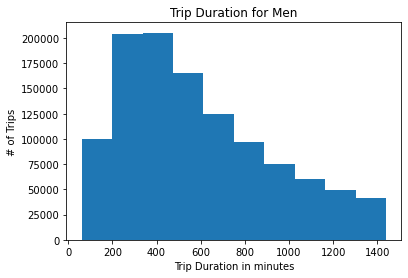

In [15]:
# your code here
plt.hist(men["tripduration"])
plt.title("Trip Duration for Men")
plt.xlabel("Trip Duration in minutes")
plt.ylabel("# of Trips")

Text(0, 0.5, '# of Trips')

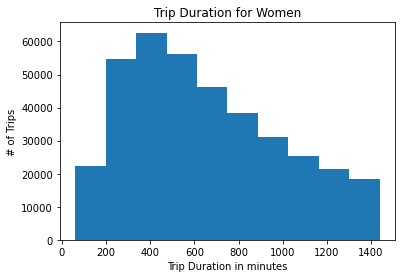

In [16]:
plt.hist(women["tripduration"])
plt.title("Trip Duration for Women")
plt.xlabel("Trip Duration in minutes")
plt.ylabel("# of Trips")

Figure 3:...

# <mark>WFF</mark> The preceeding two figures must also contain captions. Additionally, you should plot this side by side so you can effectively examine the qualitiative differences between the two histograms.

Women seem to have more trips than men.

Notice how the histograms are differnt hights: one of the two categories has a lot more trips than the other one. Figure out which and discuss it in the caption

# Statistical analysis
Run two statistical tests: the t-test and the KS-test. 


# Check if the mean of the samples is the same

Your Null hypothesis _H0_ and Alternative hypotehsis _HA_ are respectively:

H0: µ1 = µ2 (the two sample means are equal)

HA: µ1 ≠µ2 (the two sample means are not equal)

First look at the data summary statistics: are the means the same number? are the means contained within each other's standard deviations --- i.e. is 

_mean1 > mean2 - std2 and mean1 < mean2 + std2_ 

or 

_mean2 > mean1 - std1 and mean2 < mean1 + std1_ 

this will set some expextation.





In [17]:
men["tripduration"].mean()

588.2070911461445

In [18]:
women["tripduration"].mean()-women["tripduration"].std()

310.1468929924374

The means are not the same for men and women.


# <mark>WFF</mark> As I wrote above we need more here about the H0 and HA but this is a good start. Additionally, you did not quite examine the means correctly. Go back and look at the directions about comparing the means again. It's asking if one samples mean is within one standard deviation of anothers mean. That is, is the following true: mean1 - std1 <= mean2 <= mean1 + std1. You are correct that the means are not the same, but take a look at the plot I made below as I think it demonstrates the difference of the means much quicker and more accurate.

In [ ]:
s1 = men["tripduration"]
s2 = women["tripduration"]
plt.hist(s1, histtype="step")
plt.hist(s2, histtype="step")
plt.axvline(x=s1.mean())
plt.axvline(x=s2.mean())
plt.show()


To answer the question more formally  test you can use the t-test. You can use the ```ttest_ind`` function in python ```scipy.stats.ttest_ind()``` passing the first sample for a and the other for b (ind stands for independent, i.e. the assumption is that the sample are independent samples)

In [19]:
# get the usage information for the function here or on the webpage of the function
#stats.ttest_ind? 

SyntaxError: ignored

In [18]:
# your code here
stats.ttest_ind(men["tripduration"],women["tripduration"])

Ttest_indResult(statistic=-100.84403665697793, pvalue=0.0)

interpret the result based on your chosen confidence threshold and on the results of the ```ttest_ind`` function.



Women and men do not have the same trip duration when riding bikes, women seem to ride bikes longer than men do.


# Are the sample coming from the same parent distribution

The next test answers the questions: do the samples come from the same generative process (or "parent function"). Often we write the hypothesis for this test more simple as "are the distributions the same"





Write the NULL and Alternative hypothesis here

# <mark>WFF</mark> Missing H0 and HA for the ks test

Run the test ```stats.ks_2samp```

In [17]:
# your code here
stats.ks_2samp(men["tripduration"],women["tripduration"])

KstestResult(statistic=0.08422140452629323, pvalue=0.0)

In fact this test is very sensitive to differences in the mean of the sample. To use the test properly one should first normalize the data. That is: subtract the mean and divide by the standard deviation. This is how you would do it (my two clean samples for gender = 1 and gender = 2 are called cbMay19_m and cbMay19_f, yours will be possibly called differently)

In [24]:
normed_f = (women["tripduration"] - women["tripduration"].mean()) / women["tripduration"].std()
normed_m = (men["tripduration"] - men["tripduration"].mean()) / men["tripduration"].std()

rerun the test after normalizing, did the conclusion change?

In [26]:
# your code here
stats.ks_2samp(normed_m,normed_f)

KstestResult(statistic=0.022785464212612745, pvalue=1.4148236782790818e-127)

# <mark>WFF</mark> Missing conclusion

# Extra Credit : do the same for week days only and weekends only

Pandas uses an excellent package to process dates! the datetime package

The current date columns are starttime and stoptime. You can convert starttime, which is currently a column containing simple strings, to a python datetime variable as follows



In [27]:
cbMay19["starttime"]

0          2019-05-01 00:00:01.9010
1          2019-05-01 00:00:03.0210
2          2019-05-01 00:00:04.6270
3          2019-05-01 00:00:19.3340
4          2019-05-01 00:00:22.1840
                     ...           
1924558    2019-05-31 23:59:45.5760
1924559    2019-05-31 23:59:46.4650
1924560    2019-05-31 23:59:51.5060
1924561    2019-05-31 23:59:52.4170
1924562    2019-05-31 23:59:55.5500
Name: starttime, Length: 1924563, dtype: object

In [28]:
cbMay19["tripdate"] = pd.to_datetime(cbMay19.starttime)
cbMay19["tripdate"]

0         2019-05-01 00:00:01.901
1         2019-05-01 00:00:03.021
2         2019-05-01 00:00:04.627
3         2019-05-01 00:00:19.334
4         2019-05-01 00:00:22.184
                    ...          
1924558   2019-05-31 23:59:45.576
1924559   2019-05-31 23:59:46.465
1924560   2019-05-31 23:59:51.506
1924561   2019-05-31 23:59:52.417
1924562   2019-05-31 23:59:55.550
Name: tripdate, Length: 1924563, dtype: datetime64[ns]

In [29]:
wkday = cbMay19["tripdate"].dt.weekday < 5

In [30]:
wkend = cbMay19["tripdate"].dt.weekday >= 5

In [32]:
stats.ttest_ind(wkday,wkend)

Ttest_indResult(statistic=1392.893077503494, pvalue=0.0)

In [34]:
normed_wd = (wkday - wkday.mean()) / wkday.std()
normed_we = (wkend - wkend.mean()) / wkend.std()
stats.ks_2samp(normed_wd,normed_we)

KstestResult(statistic=0.5789028470359245, pvalue=0.0)

Once you have a datetime column for the start of the trip you can separate week days and weekends using the condition 

```cbMay19["tripdate"].dt.weekday < 5```

for weekdays and 

```cbMay19["tripdate"].dt.weekday >= 5```

for weekends. 

With the dataset separate in weekend and weekdays you can ask the same kind of questions: is trip duration characteristically different on weekends than on week days, or, are the gender-based differences you found for the overall sample the same for weekdays and weekends?
